<a href="https://colab.research.google.com/github/jorge-puentes-b/RegrecionLogis/blob/main/TP1/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive

Los datos son de tipo:
 Age              int64
BMI              int64
BloodPressure    int64
Glucose          int64
Insulin          int64
Outcome          int64
dtype: object
   Age                BMI  BloodPressure  Glucose            Insulin  Outcome
0   56  37124958913082000             83      147  37195511891017800        0
1   69  28256628315872500            122      159  21643902491999300        1
2   46  26025804043704000            133       90     27721087677108        0
3   32   2511213624204620            116      123   9214482722599330        1
4   60  29310693985836600             67      172  12059005956196100        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            2000 non-null   int64
 1   BMI            2000 non-null   int64
 2   BloodPressure  2000 non-null   int64
 3   Glucose 

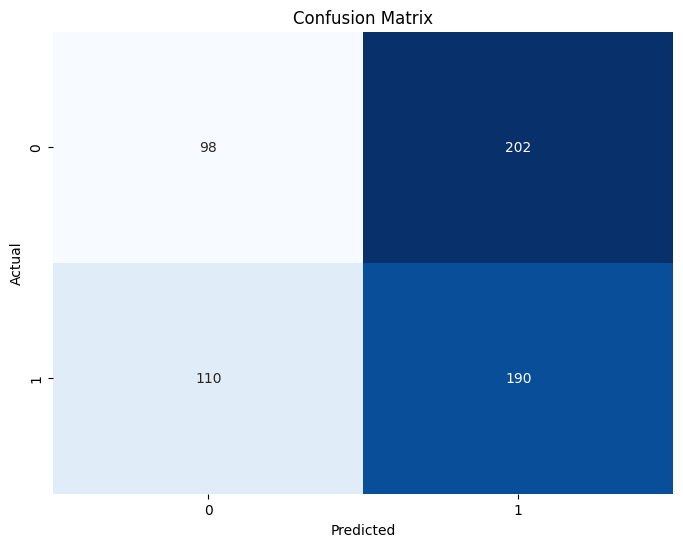

              precision    recall  f1-score   support

           0       0.47      0.33      0.39       300
           1       0.48      0.63      0.55       300

    accuracy                           0.48       600
   macro avg       0.48      0.48      0.47       600
weighted avg       0.48      0.48      0.47       600

Exactitud del modelo: 48.00%


In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# Montar Google Drive para acceder a los archivos
drive.mount('/content/drive')

# Cargar el dataset desde Google Drive
df = pd.read_excel("/content/drive/MyDrive/Diabetes.xlsx")

# Ver las dimensiones y tipos de datos del dataset
print("\nLos datos son de tipo:\n", df.dtypes)
print(df.head())
print(df.info())
print(df.describe())
print(f"Dimensiones del dataset: {df.shape}")
print("Columnas:", df.columns)

# Definir variables independientes (X) y dependiente (y)
X = df.drop('Outcome', axis=1)  # Elimina la columna 'Outcome'
y = df['Outcome']  # Variable objetivo 'Outcome'

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Escalar las características (normalización de datos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)  # Entrenar el modelo

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión usando Seaborn para el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')  # Etiqueta del eje X
plt.ylabel('Actual')  # Etiqueta del eje Y
plt.title('Confusion Matrix')  # Título
plt.show()  # Mostrar la figura

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

# Calcular y mostrar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy*100:.2f}%')